Домашнее задание 

Возьмите датасет с цветками iris’а (функция load_iris из библиотеки sklearn)
Оставьте два признака - sepal_length и sepal_width и целевую переменную - variety
Разделите данные на выборку для обучения и тестирования
Постройте модель LDA
Визуализируйте предсказания для тестовой выборки и центры классов
Отбросьте целевую переменную и оставьте только два признака - sepal_length и sepal_width
Подберите оптимальное число кластеров для алгоритма kmeans и визуализируйте полученную кластеризацию

In [163]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
from sklearn.cluster import KMeans
import seaborn as sns

In [103]:
cmap = colors.LinearSegmentedColormap(
    'red_blue_classes',
    {'red': [(0, 1, 1), (1, 0.7, 0.7)],
     'green': [(0, 0.7, 0.7), (1, 0.7, 0.7)],
     'blue': [(0, 0.7, 0.7), (1, 1, 1)]})
plt.cm.register_cmap(cmap=cmap)

In [164]:
iris=load_iris()

In [165]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [149]:
# загружаем данные в датафрейм
x = pd.DataFrame(iris.data, columns=iris.feature_names)
x = x[['sepal length (cm)','sepal width (cm)']]
x.columns = ['sepal_l','sepal_w']
y = pd.DataFrame(iris.target)
y.columns = ['target']

In [166]:
x

,sepal_l,sepal_w
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
...,...,...
145,6.7,3.0
146,6.3,2.5
147,6.5,3.0
148,6.2,3.4


In [167]:
y

,target
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [187]:
model = KMeans(n_clusters=2)
cluster = model.fit_predict(x)

#при двух кластерах более четко видны границы

In [185]:
cluster

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1,
       1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2], dtype=int32)

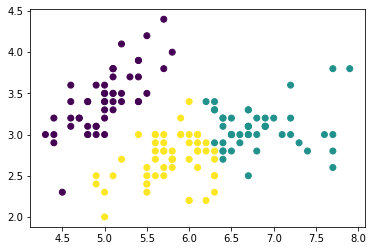

In [186]:
plt.scatter(x.sepal_l,x.sepal_w,c=cluster)


In [188]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [189]:
lda = LinearDiscriminantAnalysis()

In [211]:
# загружаем данные в датафрейм
data = pd.DataFrame(iris.data, columns=iris.feature_names)
data_class = iris.target
data=data[['sepal length (cm)','sepal width (cm)']]
data.columns=['sepal_l','sepal_w']

In [212]:
# разделяем выборку на тренировочную и тестовую
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, data_class, test_size=0.25)

In [213]:
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [214]:
# делаем прогноз на тестовой выборке
lda.predict(X_test)

array([0, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 0, 1, 1, 2, 0, 1, 2, 0,
       2, 0, 1, 0, 0, 1, 0, 0, 1, 2, 1, 2, 2, 2, 2, 0])

In [215]:
result = pd.DataFrame([y_test, lda.predict(X_test)]).T

In [216]:
result

,0,1
0,0,0
1,1,1
2,1,1
3,1,1
4,1,1
5,1,1
6,1,1
7,2,2
8,2,1
9,1,1


In [217]:
accuracy_score(y_test,lda.predict(X_test))

0.7894736842105263

In [218]:
lda.coef_

array([[-5.91302125,  7.47971759],
       [ 1.72609239, -3.76294512],
       [ 4.27738713, -4.17792054]])

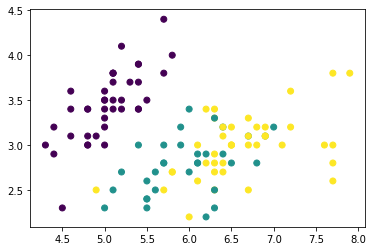

In [222]:
plt.scatter(X_train['sepal_l'],X_train['sepal_w'],c=y_train)

In [223]:
lda.means_

array([[5.03846154, 3.45384615],
       [5.971875  , 2.784375  ],
       [6.61219512, 2.98292683]])

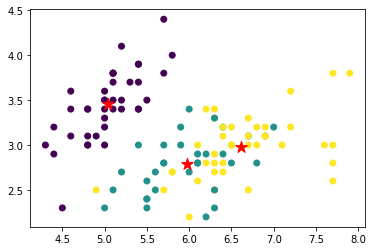

In [226]:
# сам scatter plot
plt.scatter(X_train['sepal_l'], X_train['sepal_w'], c=y_train)
# центроиды
plt.scatter(lda.means_[:, 0], lda.means_[:, 1], c='r', s=150, marker='*')

# делаем условную "сетку"
nx, ny = 200, 100
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),
                         np.linspace(y_min, y_max, ny))

# предсказываем класс каждой точки нашей сетки
Z = lda.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z = Z[:, 1].reshape(xx.shape)

